# Hierarchical Clustering

In [26]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
# Importing the dataset
df = pd.read_csv('2019.csv',sep=',')
df = df.drop(['Country or region'], axis='columns', inplace=False)
df = df.drop(['Overall rank'], axis='columns', inplace=False)

In [28]:
df

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...
151,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [29]:
# Function Encoding
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

In [30]:
# Encoding categorical data
df = encoding_char(df)

In [31]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
df = pd.DataFrame(df, columns = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']).round(2)

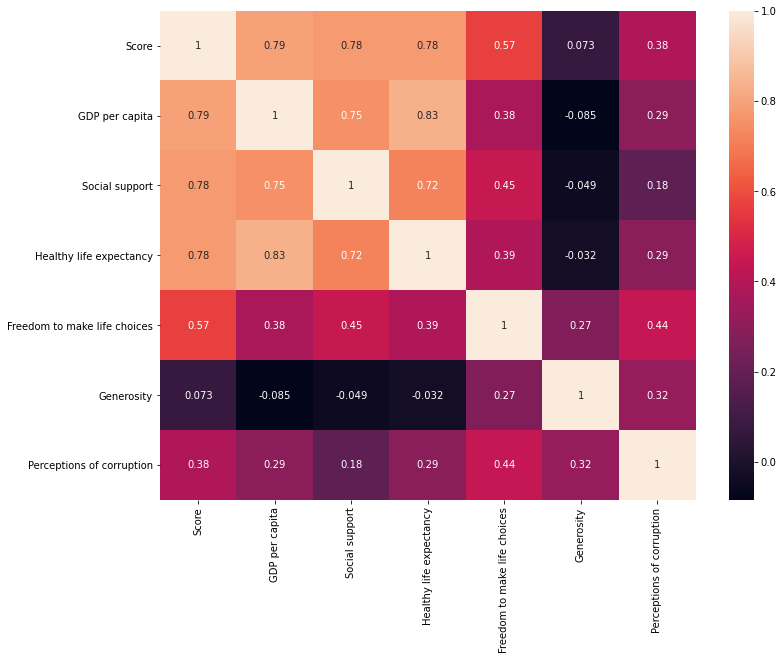

In [32]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

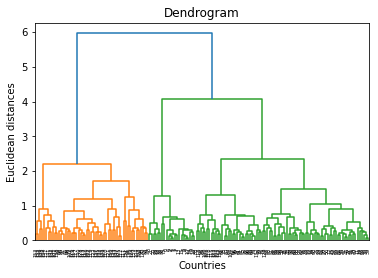

In [33]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean distances')
plt.show()

рекомендуется выделить 2 кластера, но мы выделим 4

In [34]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [35]:
hc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 3, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       0, 3, 1, 3, 3, 1, 3, 0, 3, 2, 1, 3, 3, 1, 3, 3, 1, 3, 0, 1, 1, 3,
       3, 3, 3, 0, 3, 1, 0, 0, 3, 0, 0, 0, 3, 0, 0, 3, 0, 0, 3, 3, 0, 0,
       0, 0, 0, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 1, 0, 0,
       3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [36]:
# Less features
X = df.iloc[:, [0, 1, 2, 3]]

In [37]:
X

,Score,GDP per capita,Social support,Healthy life expectancy
0,1.00,0.80,0.98,0.86
1,0.97,0.82,0.97,0.87
2,0.96,0.88,0.97,0.90
3,0.94,0.82,1.00,0.90
4,0.94,0.83,0.94,0.88
...,...,...,...,...
151,0.10,0.21,0.44,0.54
152,0.08,0.28,0.54,0.44
153,0.07,0.21,0.32,0.32
154,0.05,0.02,0.00,0.09


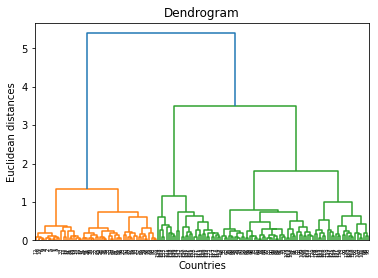

In [38]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean distances')
plt.show()

In [39]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [40]:
# Export hc clusters
import pickle
obj = {'hc': hc}
output = open('clust.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()